In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

## 1. Exploratory Data Analysis (EDA):

In [2]:
df=pd.read_csv("Hitters.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [3]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [4]:
df.isnull().sum()


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
League_mapping = lambda x: 1 if x == 'A' else 0
Division_mapping = lambda x: 1 if x == 'E' else 0
NewLeague_mapping = lambda x: 1 if x == 'A' else 0

def preprocessing(df):
    df1=df.dropna(axis=0)
    df1["League"]=df1["League"].apply(League_mapping)
    df1["NewLeague"]=df1["NewLeague"].apply(NewLeague_mapping)
    df1["Division"]=df1["Division"].apply(Division_mapping)

    return df1

In [7]:
dfn=preprocessing(df)
x=dfn.drop(["Salary"], axis=1)
y=dfn.Salary
x.shape

(263, 19)

In [8]:
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,1


## 2. PCA Analysis:

In [9]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [10]:
def sort(df):
    return np.sort(df)

In [11]:
def CovWithNumpy(df):                                         # finding covariance matrix
    cov_matrix = np.cov(df.T)
    return cov_matrix

In [12]:
def EigenVal(cov_matrix):                                   # finding eigenvalues and siegnvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues,eigenvectors

In [13]:
# calling functions
cov_matrix=CovWithNumpy(x)
eigenvalues,eigenvectors=EigenVal(cov_matrix)


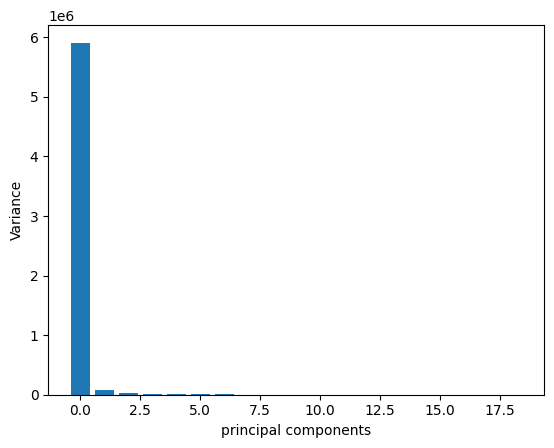

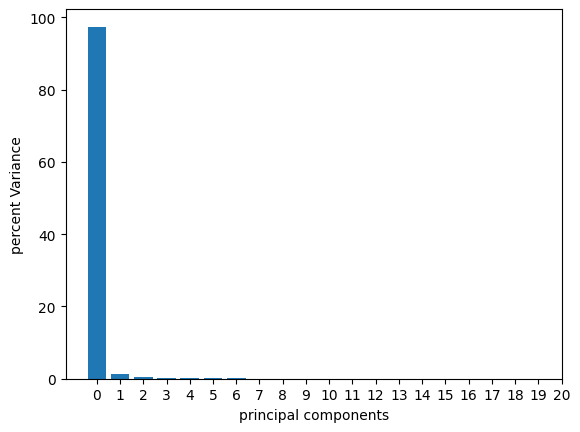

In [14]:
# plotting bar char for variance and percentage variance capture

eigenvalues_sorted=sort(eigenvalues)[::-1]
indices = np.arange(len(eigenvalues_sorted))

plt.bar(indices,eigenvalues_sorted )
plt.xlabel('principal components')
plt.ylabel('Variance')


plt.show()

sum=np.sum(eigenvalues_sorted)
eigenvalues_percent=[]
for i in eigenvalues_sorted:
    eigenvalues_percent.append((i/sum)*100)
    
plt.xlabel('principal components')
plt.ylabel('percent Variance')
plt.bar(indices,eigenvalues_percent)
plt.xticks(np.arange(0, 21, 1))
plt.show()

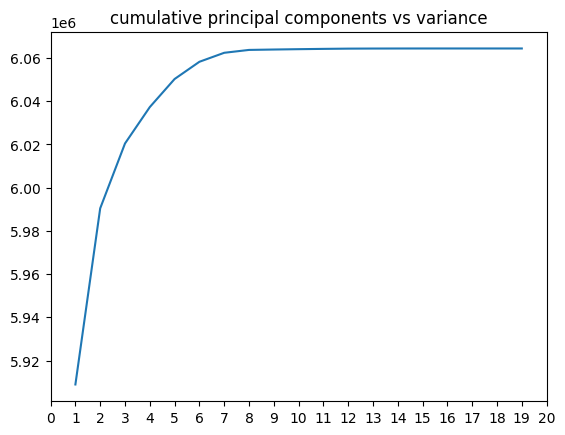

In [15]:
eigenvalues_sorted=sort(eigenvalues)[::-1]
eigenvalues_cumulative =[]
sum=0

for i in eigenvalues_sorted:
    sum=sum+i;
    eigenvalues_cumulative.append(sum)
    
index = list(range(1,len(eigenvalues_cumulative)+1))

plt.title("cumulative principal components vs variance")
plt.plot(index,eigenvalues_cumulative)
plt.xticks(np.arange(0, 21, 1))
plt.show()

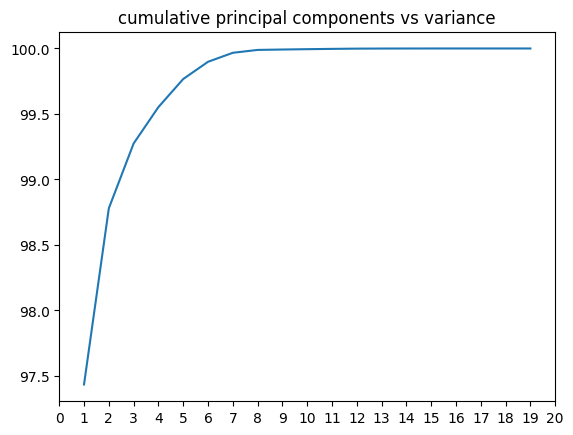

In [16]:
eigenvalues_sorted=sort(eigenvalues)[::-1]
eigenvalues_cumulative =[]
sum=0

sum_all=np.sum(eigenvalues)
for i in eigenvalues_sorted:
    sum=sum+i;
    eigenvalues_cumulative.append((sum/sum_all)*100)
    
index = list(range(1,len(eigenvalues_cumulative)+1))

plt.title("cumulative principal components vs variance")
plt.plot(index,eigenvalues_cumulative)
plt.xticks(np.arange(0, 21, 1))
plt.show()

## 3. Model Training and MSE/RMSE Calculation:

In [17]:
def split_train_test(x,y,train_size):
    split_index=int(x.shape[0]*train_size)

    x_train,x_test=x[:split_index], x[split_index:]
    y_train,y_test=y[:split_index], y[split_index:]

    return x_train, x_test, y_train, y_test

In [18]:
def top_k(eigenvalues, eigenectors, k):
    indices=np.argsort(eigenvalues)[-k:][::-1]
    
    k_eigenvectors=eigenvectors[indices]

    return k_eigenvectors



In [19]:
def PCA_Components(df, no_of_features, eigenvectors):
    df_pca = np.zeros((df.shape[0], no_of_features))
    
    for i, eigenvector in enumerate(eigenvectors):
        df.shape
        eigenvector.shape
        df_pca[:, i] = np.dot(df, eigenvector)
        

        
    return df_pca

In [20]:
def mse_rmse(x,y,eigenvalues, eigenvectors):
    test_rmse_values=[]
    train_rmse_values=[]
    test_rmse_values.append(0)
    train_rmse_values.append(0)
    for i in range(1, len(eigenvalues)+1):
        k_eigenvectors=top_k(eigenvalues,eigenvectors,i)
        x_new=PCA_Components(x,i,k_eigenvectors)
        
        
        x_train, x_test, y_train, y_test = split_train_test(x_new,y,0.8)
        
        y_test_pred,w,train_rmse,test_rmse = help(x_train,x_test,y_train,y_test,1e-10,1000)
        test_rmse_values.append(test_rmse)
        
        train_rmse_values.append(train_rmse)
        
    return test_rmse_values, train_rmse_values

In [21]:
def help(x_train,x_test,y_train,y_test,learning_rate,iterations):
    
    y_train=np.array(y_train).reshape(y_train.shape[0],1)
    y_test=np.array(y_test).reshape(y_test.shape[0],1)
    no_columns=x_train.shape[1]
    no_rows=x_train.shape[0]
    x_train = np.hstack((np.ones((no_rows, 1)), x_train))
    x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
    #w= np.zeros((no_columns+1, 1)) 
    
    #print(no_columns)# initial weights as 1
    w=np.random.rand(no_columns+1, 1)
    #print(w.shape)
    
    
    

    for i in range(iterations):
        y_pred=np.dot(x_train,w)
        error=y_pred-y_train
        derivative = -np.dot(x_train.T,error)/no_rows
        w = w - (learning_rate*derivative)
        
        

    y_train_pred=np.dot(x_train,w)
    squared_error = (y_train- y_train_pred)**2
    train_mse = np.mean(squared_error)
    train_rmse=np.sqrt(train_mse)
    

    y_test_pred=np.dot(x_test,w)
    squared_error = (y_test_pred- y_test)**2
    test_mse = np.mean(squared_error)
    test_rmse=np.sqrt(test_mse)
    

    return y_test_pred,w,train_rmse,test_rmse
    

In [22]:
test_rmse_values, train_rmse_values=mse_rmse(x,y,eigenvalues, eigenvectors)

## 4. Plotting Number of Components vs RMSE:

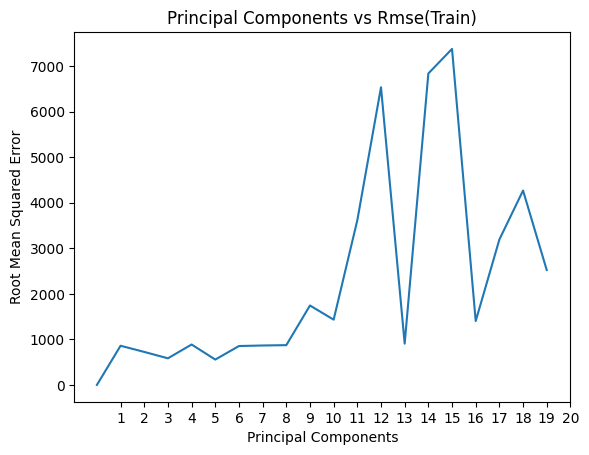

In [23]:
indices=list(range(0,20))
plt.xlabel("Principal Components")
plt.ylabel("Root Mean Squared Error")
plt.title("Principal Components vs Rmse(Train)")
plt.plot(indices,train_rmse_values)
plt.xticks(np.arange(1, 21, 1))
plt.show()

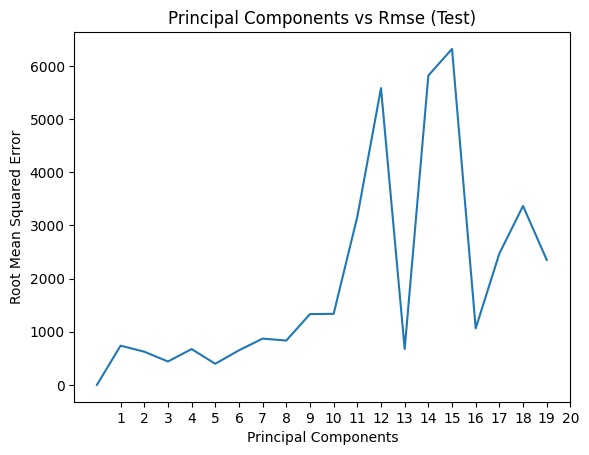

In [24]:


plt.xlabel("Principal Components")
plt.ylabel("Root Mean Squared Error")
plt.title("Principal Components vs Rmse (Test)")
plt.plot(indices,test_rmse_values)
plt.xticks(np.arange(1, 21, 1))
plt.show()

In [25]:
no_effecient_components=3

## 5. Testing the Most Efficient Model

In [26]:
cov_matrix=CovWithNumpy(x)
eigenvalues,eigenvectors=EigenVal(cov_matrix)

In [27]:
effecient_eigenvectors=top_k(eigenvalues, eigenvectors, no_effecient_components)
x_pca_effecient = PCA_Components(x,x.shape[0],effecient_eigenvectors)
x_train, x_test, y_train, y_test = split_train_test(x_pca_effecient,y,0.8)

In [28]:
# training model
y_test_pred,w,train_rmse,test_rmse = help(x_train,x_test,y_train,y_test,1e-10,1000)

In [29]:
print("train_rmse : ",train_rmse,"test_rmse : ",test_rmse)

train_rmse :  443.3339906442771 test_rmse :  334.7653713077771


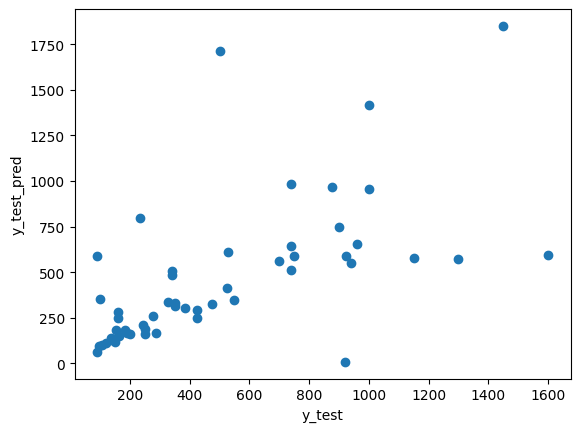

In [30]:
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.scatter(y_test,y_test_pred)

## 6. Conclusion and Analysis:

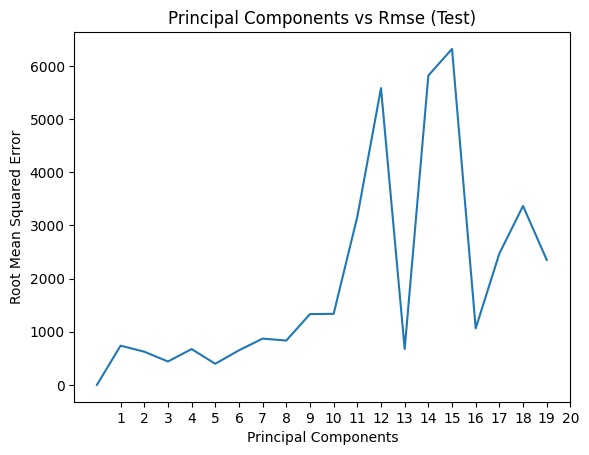

In [31]:
plt.xlabel("Principal Components")
plt.ylabel("Root Mean Squared Error")
plt.title("Principal Components vs Rmse (Test)")
plt.plot(indices,test_rmse_values)
plt.xticks(np.arange(1, 21, 1))
plt.show()

From above graph we can observe that the corresponding to no of components = 3 gives the best result which is implemented above.